In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import util
from sklearn.datasets import fetch_mldata

%matplotlib inline 

### Download MNIST e separar apenas os exemplos de dígitos 0 e 1

In [11]:
mnist = fetch_mldata('MNIST original') 
vals = set()
for idx, label in enumerate(mnist.target):
    if (label <= 2):
        vals.add(idx)
data_mnist = np.array([mnist.data[idx] for idx in vals])
label_mnist = np.array([mnist.target[idx] for idx in vals])
print(data_mnist.shape, label_mnist.shape)

(21770, 784) (21770,)


### Selecionando e visualizando um subdataset com n exemplos

In [70]:
new_data, new_labels = util.get_samples(data_mnist, 
                                        label_mnist, 
                                        size=1000)

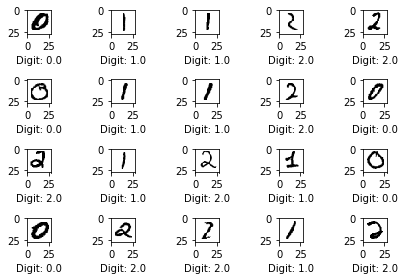

In [15]:
util.plot_img_grid(new_data, 
                   new_labels, 
                   max_cols = 5)

### Snippet simples que itera sobre uma lista de vetores de imagem e mostra eles em tela com uma pausa de 1 segundo 

3.164021164021164

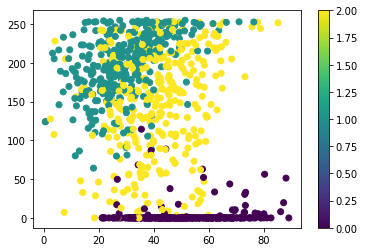

In [193]:
j = 0
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
for i in range(len(new_data)):
    img = util.array2img(new_data[i])
    x1.append(np.mean(img[0:14,0:14]))
    x2.append(np.mean(img[0:14,14:28]))
    x3.append(np.mean(img[14:28,0:14]))
    x4.append(np.mean(img[14:28,14:28]))
    x5.append(np.mean(img[14:17,13:16]))
plt.scatter(x2,x5,c=new_labels)
plt.colorbar();
x5 = np.array(x5)
np.mean(x5[new_labels < 1])

## Exemplo Classificação binária de dígitos com base em regras

#### Analisando as imagens dos dígitos 0 e 1, codifique uma função que receba uma imagem e retorne uma predição em float: 0.0 se o dígito for reconhecido como zero e 1.0 caso contrário

In [194]:
import random
def classifier(flat_img):
    img = util.array2img(flat_img)
    x1 = np.mean(img[0:14,0:14])
    x2 = np.mean(img[0:14,14:28])
    x3 = np.mean(img[14:28,0:14])
    x4 = np.mean(img[14:28,14:28])
    x5 = np.mean(img[14:17,13:16])
    if x5 < 20: # or x3 > 80 or x5 < 5: # 0
        return 0.0
    if (x5 < 3*x2 + 50) and x2 > 20:
        return 2.0
    if x1 < 10 or (x5 > 3*x2 + 50): #1
        return 1.0
    x = random.randint(0,2)
    return float(x)

In [195]:
def predictor(data, classifier=None):
    assert classifier is not None, "Classifier not implemented or not passed to predictor function"
    predictions = []
    for i,_ in enumerate(data):
        class_prediction = classifier(data[i])
        predictions.append(class_prediction)

    predictions = np.asarray(predictions, 
                             dtype=new_labels.dtype)
    return predictions

In [196]:
def evaluator(true_labels, predicted_labels, normalized=True):
    assert true_labels.shape[0] == predicted_labels.shape[0], "Original labels and predicted labels \
                                                               doesn't match in rows number"
    util.plot_confusion_matrix_metrics(true_labels=true_labels,
                                       predicted_labels=predicted_labels,
                                       normalized=True)

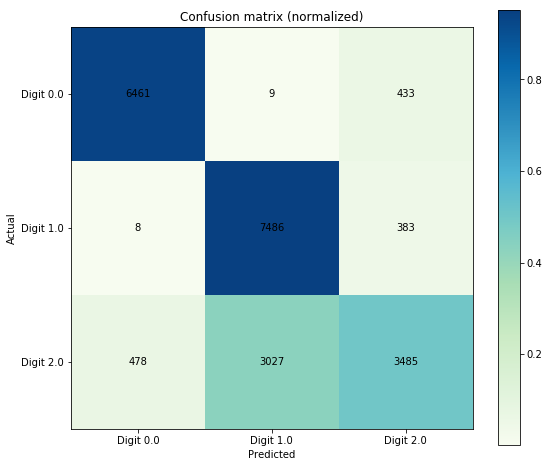

Predicted   0.0    1.0   2.0  __all__
Actual                               
0.0        6461      9   433     6903
1.0           8   7486   383     7877
2.0         478   3027  3485     6990
__all__    6947  10522  4301    21770
Evaluation metrics:
Confusion Matrix:

Predicted   0.0    1.0   2.0  __all__
Actual                               
0.0        6461      9   433     6903
1.0           8   7486   383     7877
2.0         478   3027  3485     6990
__all__    6947  10522  4301    21770


Overall Statistics:

Accuracy: 0.800734956361966
95% CI: (0.7953658468380498, 0.8060236478878644)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0.6983111389818883
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                      0.0        1.0        2.0
Population                                 21770      21770      21770
P: Condition positive                       6903       7877       6990
N: Condition negative                      14867      13893      

In [197]:
predictions = predictor(data_mnist, classifier=classifier)
evaluator(true_labels=label_mnist, predicted_labels=predictions)